In [92]:
from ebooklib import epub
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
def chap2text(chap):
    blacklist = ['[document]', 'noscript', 'header',
                 'html', 'meta', 'head', 'input', 'script']
    output = ''
    soup = BeautifulSoup(chap, 'html.parser')
    text = soup.find_all(text=True)
    for t in text:
        if t.parent.name not in blacklist:
            output += '{} '.format(t)
    return output

def read_book(temporary_location):
  book = epub.read_epub(temporary_location)
  chapters = []
  for item in book.get_items():
    if str(type(item)) == "<class 'ebooklib.epub.EpubHtml'>":
      chapters.append(item.get_content())
  Output = []
  for html in chapters:
      text = chap2text(html)
      Output.append(text)
  return Output

In [13]:
alice = '/Users/christophersparrow/code/gorthalaxy/book-woofer-front/front/temp.epub'
book = read_book(alice)

In [14]:
#Create a list of paragraphs from the chapter file

sentences_list = book[0].splitlines()

paragraph_index_start = []
for i in range(3, len(sentences_list)):
    if sentences_list[i] != ' ' and sentences_list[i-1] == ' ':
        paragraph_index_start.append(i)

paragraph_index_end = []
for i in range(3, len(sentences_list)):
    if sentences_list[i] != ' ' and sentences_list[i+1] == ' ':
        paragraph_index_end.append(i)

paragraphs = []
for i in range(len(paragraph_index_start)):
    paragraphs.append(''.join(sentences_list[paragraph_index_start[i]:paragraph_index_end[i]+1]))  


In [110]:
import pickle
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import os

def load_the_model(path):
     model = keras.models.load_model(path)
     with open('/Users/christophersparrow/code/new keir/book-woofer/models/tokenizer.pickle', 'rb') as handle:
         tokenizer = pickle.load(handle)
     print ('model loaded')
     return model, tokenizer

#def load_the_model():
#    model = keras.models.load_model(os.path.join('models', 'model3'))
#    with open((os.path.join('models', 'tokenizer.pickle')), 'rb') as handle:
#        tokenizer = pickle.load(handle)
#    print ('model loaded')
#    return model, tokenizer

def predict(sentence, model, tokenizer):
    sentence_lst=[]
    sentence_lst.append(sentence)
    sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
    sentence_padded=pad_sequences(sentence_seq,maxlen=1000,padding='post')
    ans=model.predict(sentence_padded)
    print(ans)
    # ans= list(ans)
    # print(ans)
    labels = ['anger', 'fear', 'happy', 'love','neutral','sadness']
    ans_dict = dict(zip(labels, ans[0]))
    print(ans_dict)
    print("The emotion predicted is",ans_dict)
    return {k: float(v) for k, v in ans_dict.items()}

In [95]:
path_model3 = '/Users/christophersparrow/code/new keir/book-woofer/models/model3'

In [98]:
model, tokenizer = load_the_model(path_model3)

model loaded


In [101]:
predict(paragraphs[4], model, tokenizer)

2021-06-15 13:18:04.109 WARNING tensorflow: Model was constructed with shape (None, 66) for input KerasTensor(type_spec=TensorSpec(shape=(None, 66), dtype=tf.float32, name='embedding_2_input'), name='embedding_2_input', description="created by layer 'embedding_2_input'"), but it was called on an input with incompatible shape (None, 1000).


[[1.4376339e-03 3.7987356e-04 9.9362248e-01 2.2039230e-03 4.0567730e-04
  1.9504367e-03]]
{'anger': 0.0014376339, 'fear': 0.00037987356, 'happy': 0.9936225, 'love': 0.002203923, 'neutral': 0.0004056773, 'sadness': 0.0019504367}
The emotion predicted is {'anger': 0.0014376339, 'fear': 0.00037987356, 'happy': 0.9936225, 'love': 0.002203923, 'neutral': 0.0004056773, 'sadness': 0.0019504367}


{'anger': 0.0014376338804140687,
 'fear': 0.0003798735560849309,
 'happy': 0.9936224818229675,
 'love': 0.002203922951593995,
 'neutral': 0.00040567730320617557,
 'sadness': 0.0019504367373883724}

In [54]:
del paragraphs[18]

In [55]:
paragraph_predict = []
for i in range(len(paragraphs)):
    paragraph_predict.append(predict(paragraphs[i], model, tokenizer))

[[0.00220367 0.01211667 0.46465987 0.4584739  0.00579056 0.05675533]]
{'anger': 0.002203671, 'fear': 0.0121166725, 'happy': 0.46465987, 'love': 0.4584739, 'neutral': 0.005790558, 'sadness': 0.056755334}
The emotion predicted is {'anger': 0.002203671, 'fear': 0.0121166725, 'happy': 0.46465987, 'love': 0.4584739, 'neutral': 0.005790558, 'sadness': 0.056755334}
[[9.9986684e-01 3.1251111e-05 1.1086737e-05 3.1490011e-08 9.0007452e-05
  8.8211078e-07]]
{'anger': 0.99986684, 'fear': 3.125111e-05, 'happy': 1.1086737e-05, 'love': 3.149001e-08, 'neutral': 9.000745e-05, 'sadness': 8.821108e-07}
The emotion predicted is {'anger': 0.99986684, 'fear': 3.125111e-05, 'happy': 1.1086737e-05, 'love': 3.149001e-08, 'neutral': 9.000745e-05, 'sadness': 8.821108e-07}
[[8.0775516e-03 1.0235424e-03 4.5528859e-02 6.3883333e-04 9.4468755e-01
  4.3727479e-05]]
{'anger': 0.008077552, 'fear': 0.0010235424, 'happy': 0.04552886, 'love': 0.0006388333, 'neutral': 0.94468755, 'sadness': 4.372748e-05}
The emotion predic

[[0.19515258 0.16757083 0.18523647 0.13156381 0.1681449  0.1523315 ]]
{'anger': 0.19515258, 'fear': 0.16757083, 'happy': 0.18523647, 'love': 0.13156381, 'neutral': 0.1681449, 'sadness': 0.1523315}
The emotion predicted is {'anger': 0.19515258, 'fear': 0.16757083, 'happy': 0.18523647, 'love': 0.13156381, 'neutral': 0.1681449, 'sadness': 0.1523315}


In [56]:
len(paragraph_predict)

23

In [57]:
print(paragraph_predict)

[{'anger': 0.0022036710288375616, 'fear': 0.012116672471165657, 'happy': 0.4646598696708679, 'love': 0.45847389101982117, 'neutral': 0.0057905581779778, 'sadness': 0.05675533413887024}, {'anger': 0.9998668432235718, 'fear': 3.1251111067831516e-05, 'happy': 1.1086736776633188e-05, 'love': 3.149001059910006e-08, 'neutral': 9.00074519449845e-05, 'sadness': 8.82110782640666e-07}, {'anger': 0.008077551610767841, 'fear': 0.0010235423687845469, 'happy': 0.04552885890007019, 'love': 0.0006388333276845515, 'neutral': 0.94468754529953, 'sadness': 4.372747935121879e-05}, {'anger': 0.0006064266781322658, 'fear': 0.0001477767655160278, 'happy': 0.0005854305345565081, 'love': 3.6523581457004184e-06, 'neutral': 0.9986565113067627, 'sadness': 2.7838365213028737e-07}, {'anger': 0.0014376338804140687, 'fear': 0.0003798735560849309, 'happy': 0.9936224818229675, 'love': 0.002203922951593995, 'neutral': 0.00040567730320617557, 'sadness': 0.0019504367373883724}, {'anger': 0.9614799618721008, 'fear': 0.00056

In [59]:
paragraph_predict[1]['anger']

0.9998668432235718

In [88]:
df = pd.DataFrame(paragraph_predict)

In [89]:
df

,anger,fear,happy,love,neutral,sadness
0,0.002204,0.012117,0.464660,4.584739e-01,0.005791,5.675533e-02
1,0.999867,0.000031,0.000011,3.149001e-08,0.000090,8.821108e-07
2,0.008078,0.001024,0.045529,6.388333e-04,0.944688,4.372748e-05
3,0.000606,0.000148,0.000585,3.652358e-06,0.998657,2.783837e-07
4,0.001438,0.000380,0.993622,2.203923e-03,0.000406,1.950437e-03
5,0.961480,0.000567,0.003879,1.061832e-03,0.032979,3.350060e-05
6,0.012458,0.018751,0.377492,3.142638e-02,0.052998,5.068746e-01
7,0.007572,0.002676,0.069769,9.004430e-04,0.918995,8.788074e-05
8,0.002115,0.001496,0.977590,6.564823e-03,0.012076,1.589232e-04
9,0.680165,0.001446,0.003967,1.578584e-04,0.313392,8.715906e-04


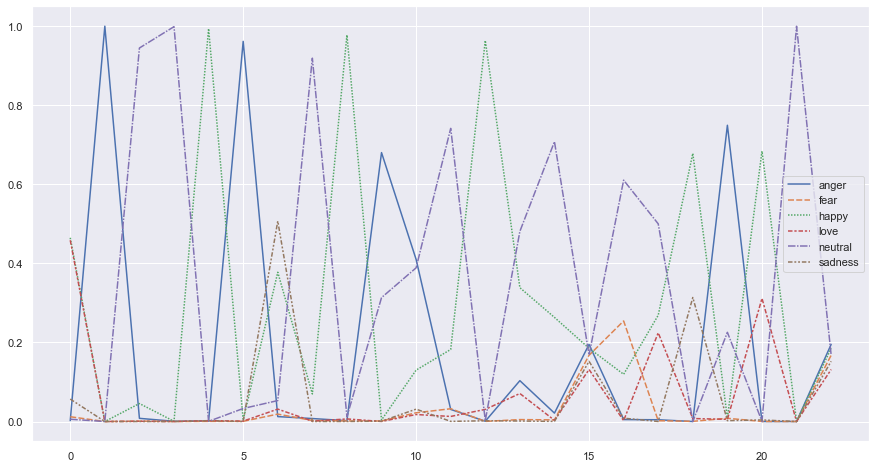

In [94]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df)

In [99]:
path_model7 = '/Users/christophersparrow/code/Models/model_7'

In [112]:
model7, tokenizer = load_the_model(path_model7)

model loaded


In [113]:
paragraph_predict7 = []
for i in range(len(paragraphs)):
    paragraph_predict7.append(predict(paragraphs[i], model7, tokenizer))

2021-06-15 13:23:46.949 WARNING tensorflow: Model was constructed with shape (None, 66) for input KerasTensor(type_spec=TensorSpec(shape=(None, 66), dtype=tf.float32, name='embedding_6_input'), name='embedding_6_input', description="created by layer 'embedding_6_input'"), but it was called on an input with incompatible shape (None, 1000).


[[0.09145937 0.38756955 0.08802793 0.01326895 0.16914262 0.25053158]]
{'anger': 0.09145937, 'fear': 0.38756955, 'happy': 0.08802793, 'love': 0.013268948, 'neutral': 0.16914262, 'sadness': 0.25053158}
The emotion predicted is {'anger': 0.09145937, 'fear': 0.38756955, 'happy': 0.08802793, 'love': 0.013268948, 'neutral': 0.16914262, 'sadness': 0.25053158}
[[0.17670132 0.1738816  0.16030431 0.02993686 0.02538969 0.4337862 ]]
{'anger': 0.17670132, 'fear': 0.1738816, 'happy': 0.16030431, 'love': 0.029936865, 'neutral': 0.02538969, 'sadness': 0.4337862}
The emotion predicted is {'anger': 0.17670132, 'fear': 0.1738816, 'happy': 0.16030431, 'love': 0.029936865, 'neutral': 0.02538969, 'sadness': 0.4337862}
[[0.04793625 0.19634746 0.4071954  0.04548132 0.07672784 0.22631165]]
{'anger': 0.047936246, 'fear': 0.19634746, 'happy': 0.4071954, 'love': 0.045481317, 'neutral': 0.07672784, 'sadness': 0.22631165}
The emotion predicted is {'anger': 0.047936246, 'fear': 0.19634746, 'happy': 0.4071954, 'love'

In [114]:
df7 = pd.DataFrame(paragraph_predict7)

In [115]:
df7

,anger,fear,happy,love,neutral,sadness
0,0.091459,0.387570,0.088028,0.013269,0.169143,0.250532
1,0.176701,0.173882,0.160304,0.029937,0.025390,0.433786
2,0.047936,0.196347,0.407195,0.045481,0.076728,0.226312
3,0.035308,0.373797,0.111138,0.019066,0.217596,0.243095
4,0.075991,0.324023,0.173086,0.029060,0.161230,0.236610
5,0.186141,0.124744,0.194956,0.022242,0.015021,0.456895
6,0.059550,0.271670,0.241904,0.031040,0.145039,0.250797
7,0.147266,0.215837,0.276674,0.057734,0.140668,0.161821
8,0.122636,0.332120,0.061236,0.013813,0.072944,0.397250
9,0.150363,0.371311,0.033789,0.006202,0.060681,0.377654


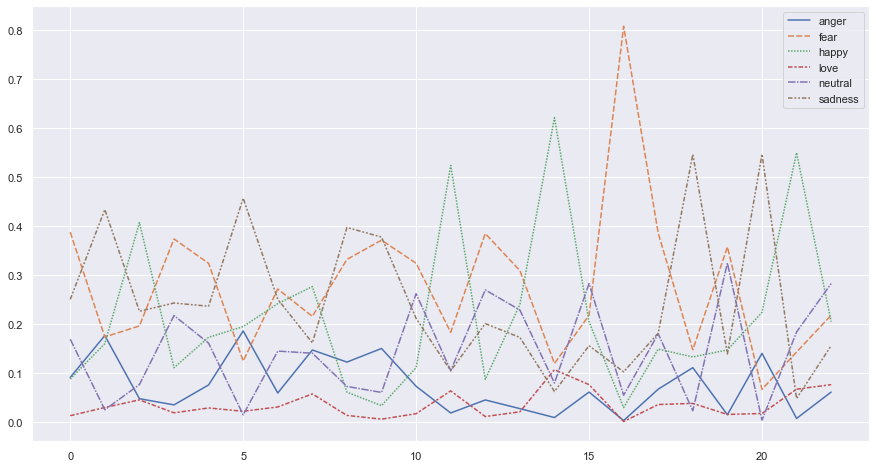

In [116]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df7)